# Make predictions in production

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [ ]:
# (height, width, channels)
input_shape = (224, 224, 3)
batch_size = 8
learning_rate = 1e-5
neurons = 128
path_dataset = 'dataset_cat_dogs'
folder_cat = 'Cat'
folder_dog = 'Dog'
folder_models = 'models'
path_test = './test/cat_or_dog_1.jpg'

In [ ]:
def prediction(path: 'str', model) -> None:
    test_img = image.load_img(path, target_size=input_shape)
    test_img = image.img_to_array(test_img) / 255.0
    test_img = np.expand_dims(test_img, axis=0)

    prob = model.predict(test_img)[0][0]

    print(f"Probability to be: 🐱 Cat {(1-prob):.4f}, 🐶 Dog: {prob:.4f}")
    print(" 🐶 Dog\n" if prob >= 0.5 else " 🐱 Cat\n")

model_v2 = load_model(os.path.join(folder_models,'binary_model_v2.h5'))
model_v3 = load_model(os.path.join(folder_models,'binary_model_v3.h5'))

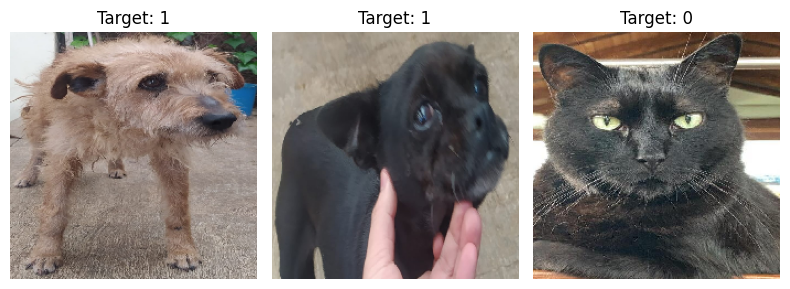

In [ ]:
# Select images to be tested
test = ['./test/a.jpeg','./test/b.jpeg','./test/c.jpeg']
label_test = [1,1,0]

# Show test images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 5))
for ax, img_path, target in zip(axes, test, label_test):
    img = image.load_img(img_path, target_size=input_shape)
    ax.imshow(img)
    ax.set_title(f"Target: {target}")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [34]:
# Make predictions
prediction('./test/a.jpeg', model_v2)
prediction('./test/b.jpeg', model_v2)
prediction('./test/c.jpeg', model_v2)

1/1 [==============================] - 0s 115ms/step
Probability to be: 🐱 Cat 0.3627, 🐶 Dog: 0.6373
 🐶 Dog

1/1 [==============================] - 0s 98ms/step
Probability to be: 🐱 Cat 0.2404, 🐶 Dog: 0.7596
 🐶 Dog

1/1 [==============================] - 0s 86ms/step
Probability to be: 🐱 Cat 0.3162, 🐶 Dog: 0.6838
 🐶 Dog



Model version 2 is not good enought. Let's try with model version 3.

In [35]:
# Make predictions
prediction('./test/a.jpeg', model_v3)
prediction('./test/b.jpeg', model_v3)
prediction('./test/c.jpeg', model_v3)

1/1 [==============================] - 0s 103ms/step
Probability to be: 🐱 Cat 0.2423, 🐶 Dog: 0.7577
 🐶 Dog

1/1 [==============================] - 0s 101ms/step
Probability to be: 🐱 Cat 0.4297, 🐶 Dog: 0.5703
 🐶 Dog

1/1 [==============================] - 0s 113ms/step
Probability to be: 🐱 Cat 0.7623, 🐶 Dog: 0.2377
 🐱 Cat



Model version 3 is good enought!!.